# Federico Ariton
# Higher Diploma in Science in Data Analytics for Business
# CA 1
# Student Number:sba2209

In [3]:
# Importing the libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [4]:
bank_data = pd.read_csv("bank-dataset.csv" , sep = ';')

In [5]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
bank_data.duration

0        261
1        149
2        226
3        151
4        307
        ... 
41183    334
41184    383
41185    189
41186    442
41187    239
Name: duration, Length: 41188, dtype: int64

In [7]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [8]:
bank_data.shape

(41188, 21)

In [9]:
# Basic statistical summary for numerical columns
numerical_summary = bank_data.describe()

# Count of unique values for categorical columns
categorical_summary = bank_data.select_dtypes(include=['object']).nunique()

numerical_summary, categorical_summary


(               age      duration      campaign         pdays      previous  \
 count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
 mean      40.02406    258.285010      2.567593    962.475454      0.172963   
 std       10.42125    259.279249      2.770014    186.910907      0.494901   
 min       17.00000      0.000000      1.000000      0.000000      0.000000   
 25%       32.00000    102.000000      1.000000    999.000000      0.000000   
 50%       38.00000    180.000000      2.000000    999.000000      0.000000   
 75%       47.00000    319.000000      3.000000    999.000000      0.000000   
 max       98.00000   4918.000000     56.000000    999.000000      7.000000   
 
        emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
 count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
 mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
 std        1.570960        0.578840     

In [10]:
# Check for missing values in the dataset
bank_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

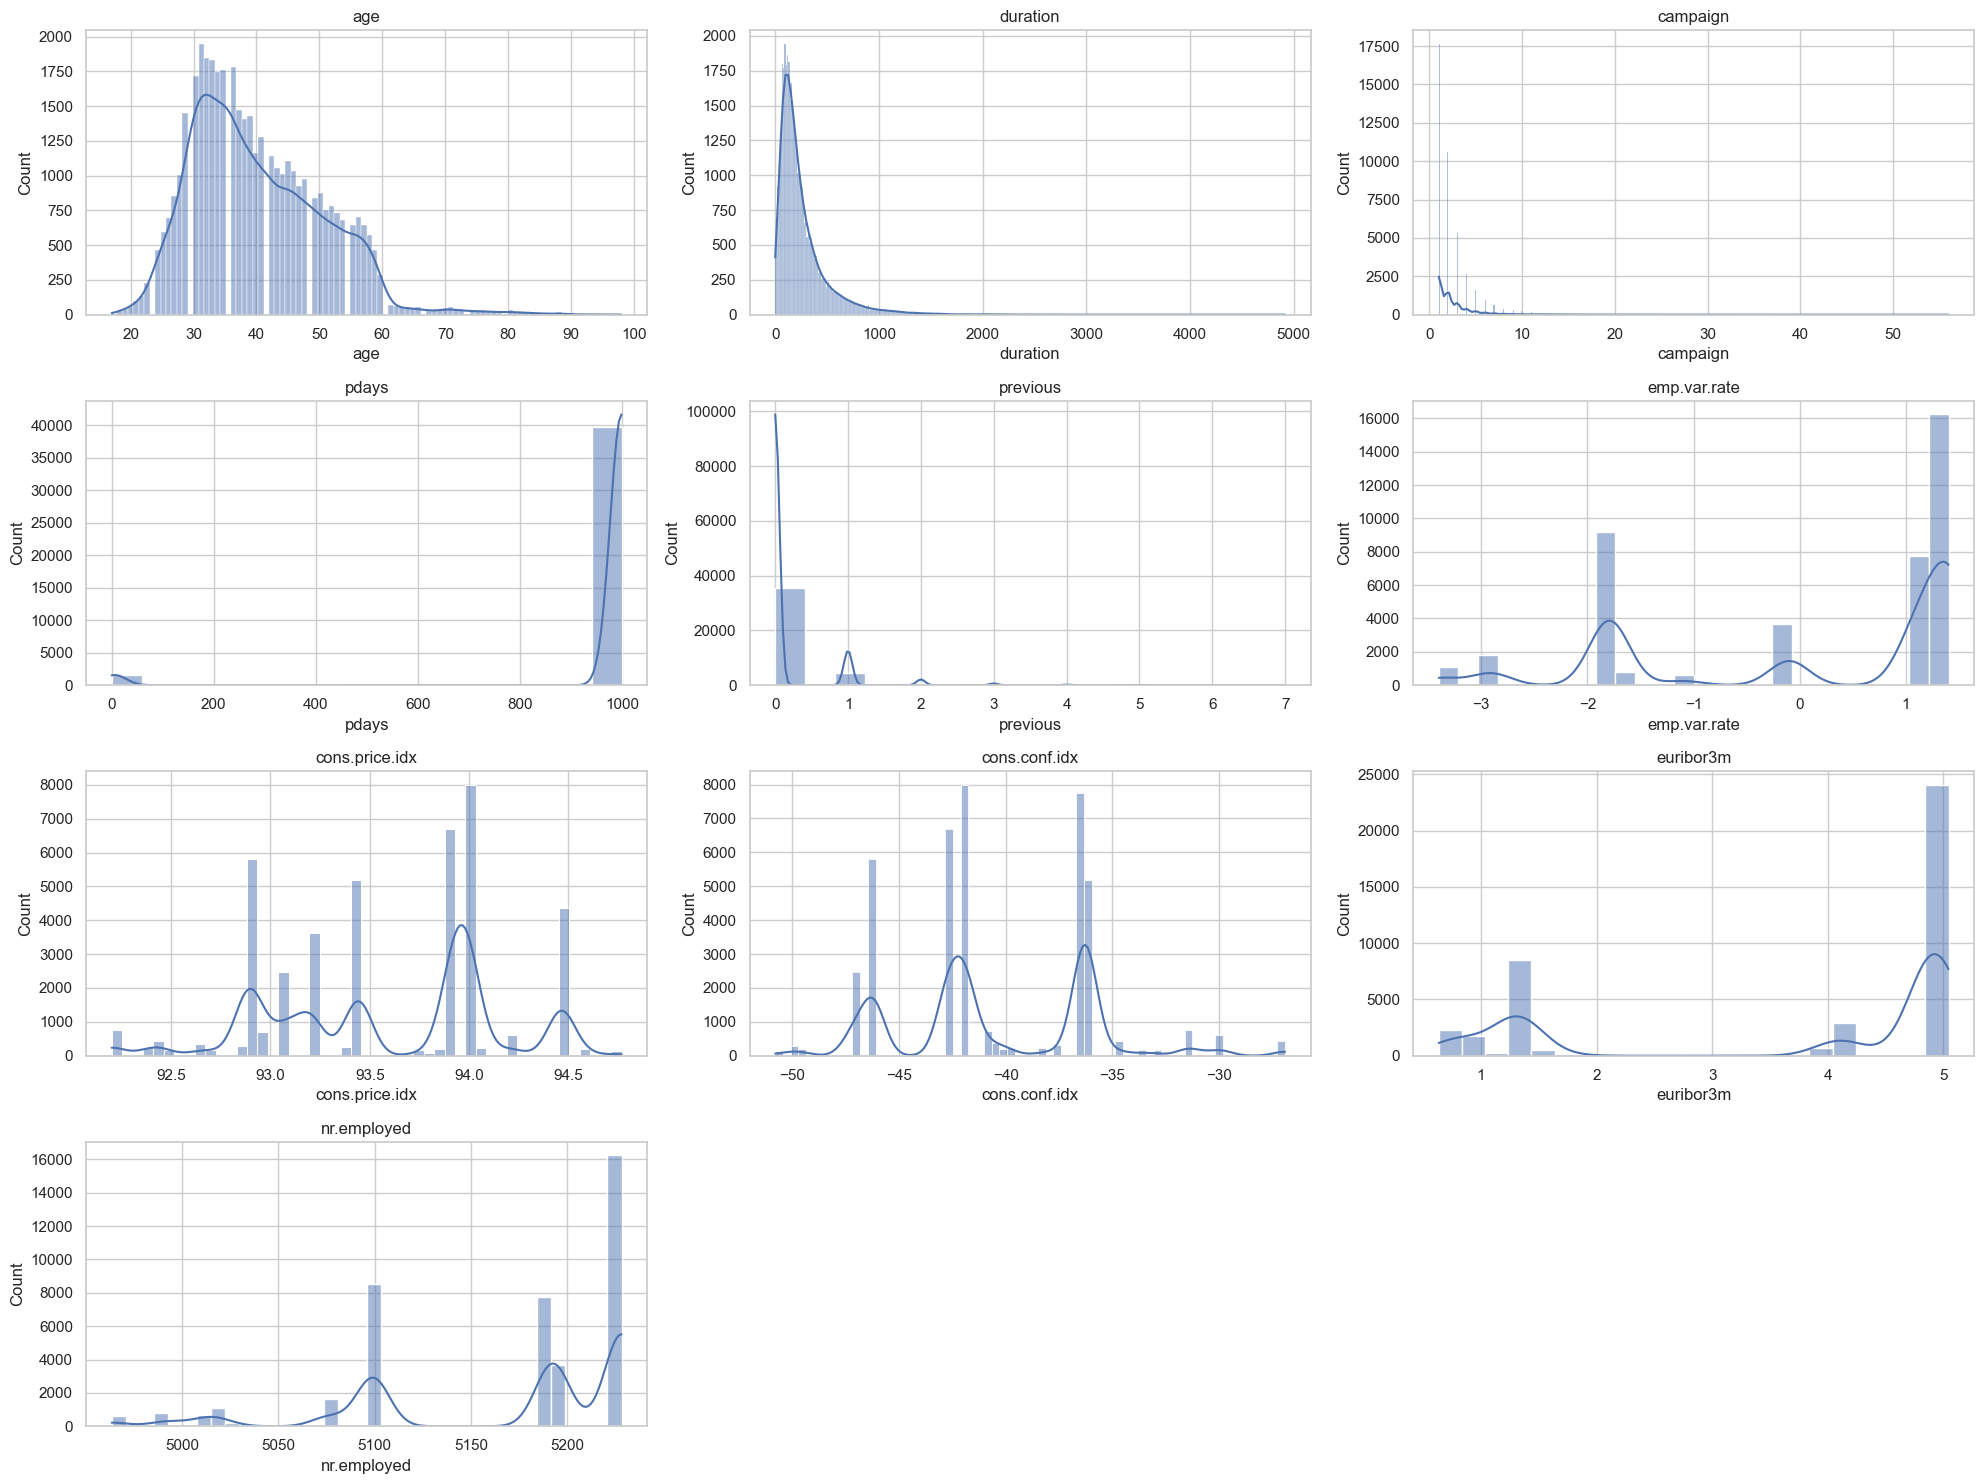

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Selecting numerical columns for histograms
numerical_columns = bank_data.select_dtypes(include=['int64', 'float64']).columns

# Plotting histograms for numerical columns
plt.figure(figsize=(20, 15))

for i, col in enumerate(numerical_columns):
    plt.subplot(4, 3, i + 1)
    sns.histplot(bank_data[col], kde=True)
    plt.title(col)
    plt.tight_layout()

plt.show()

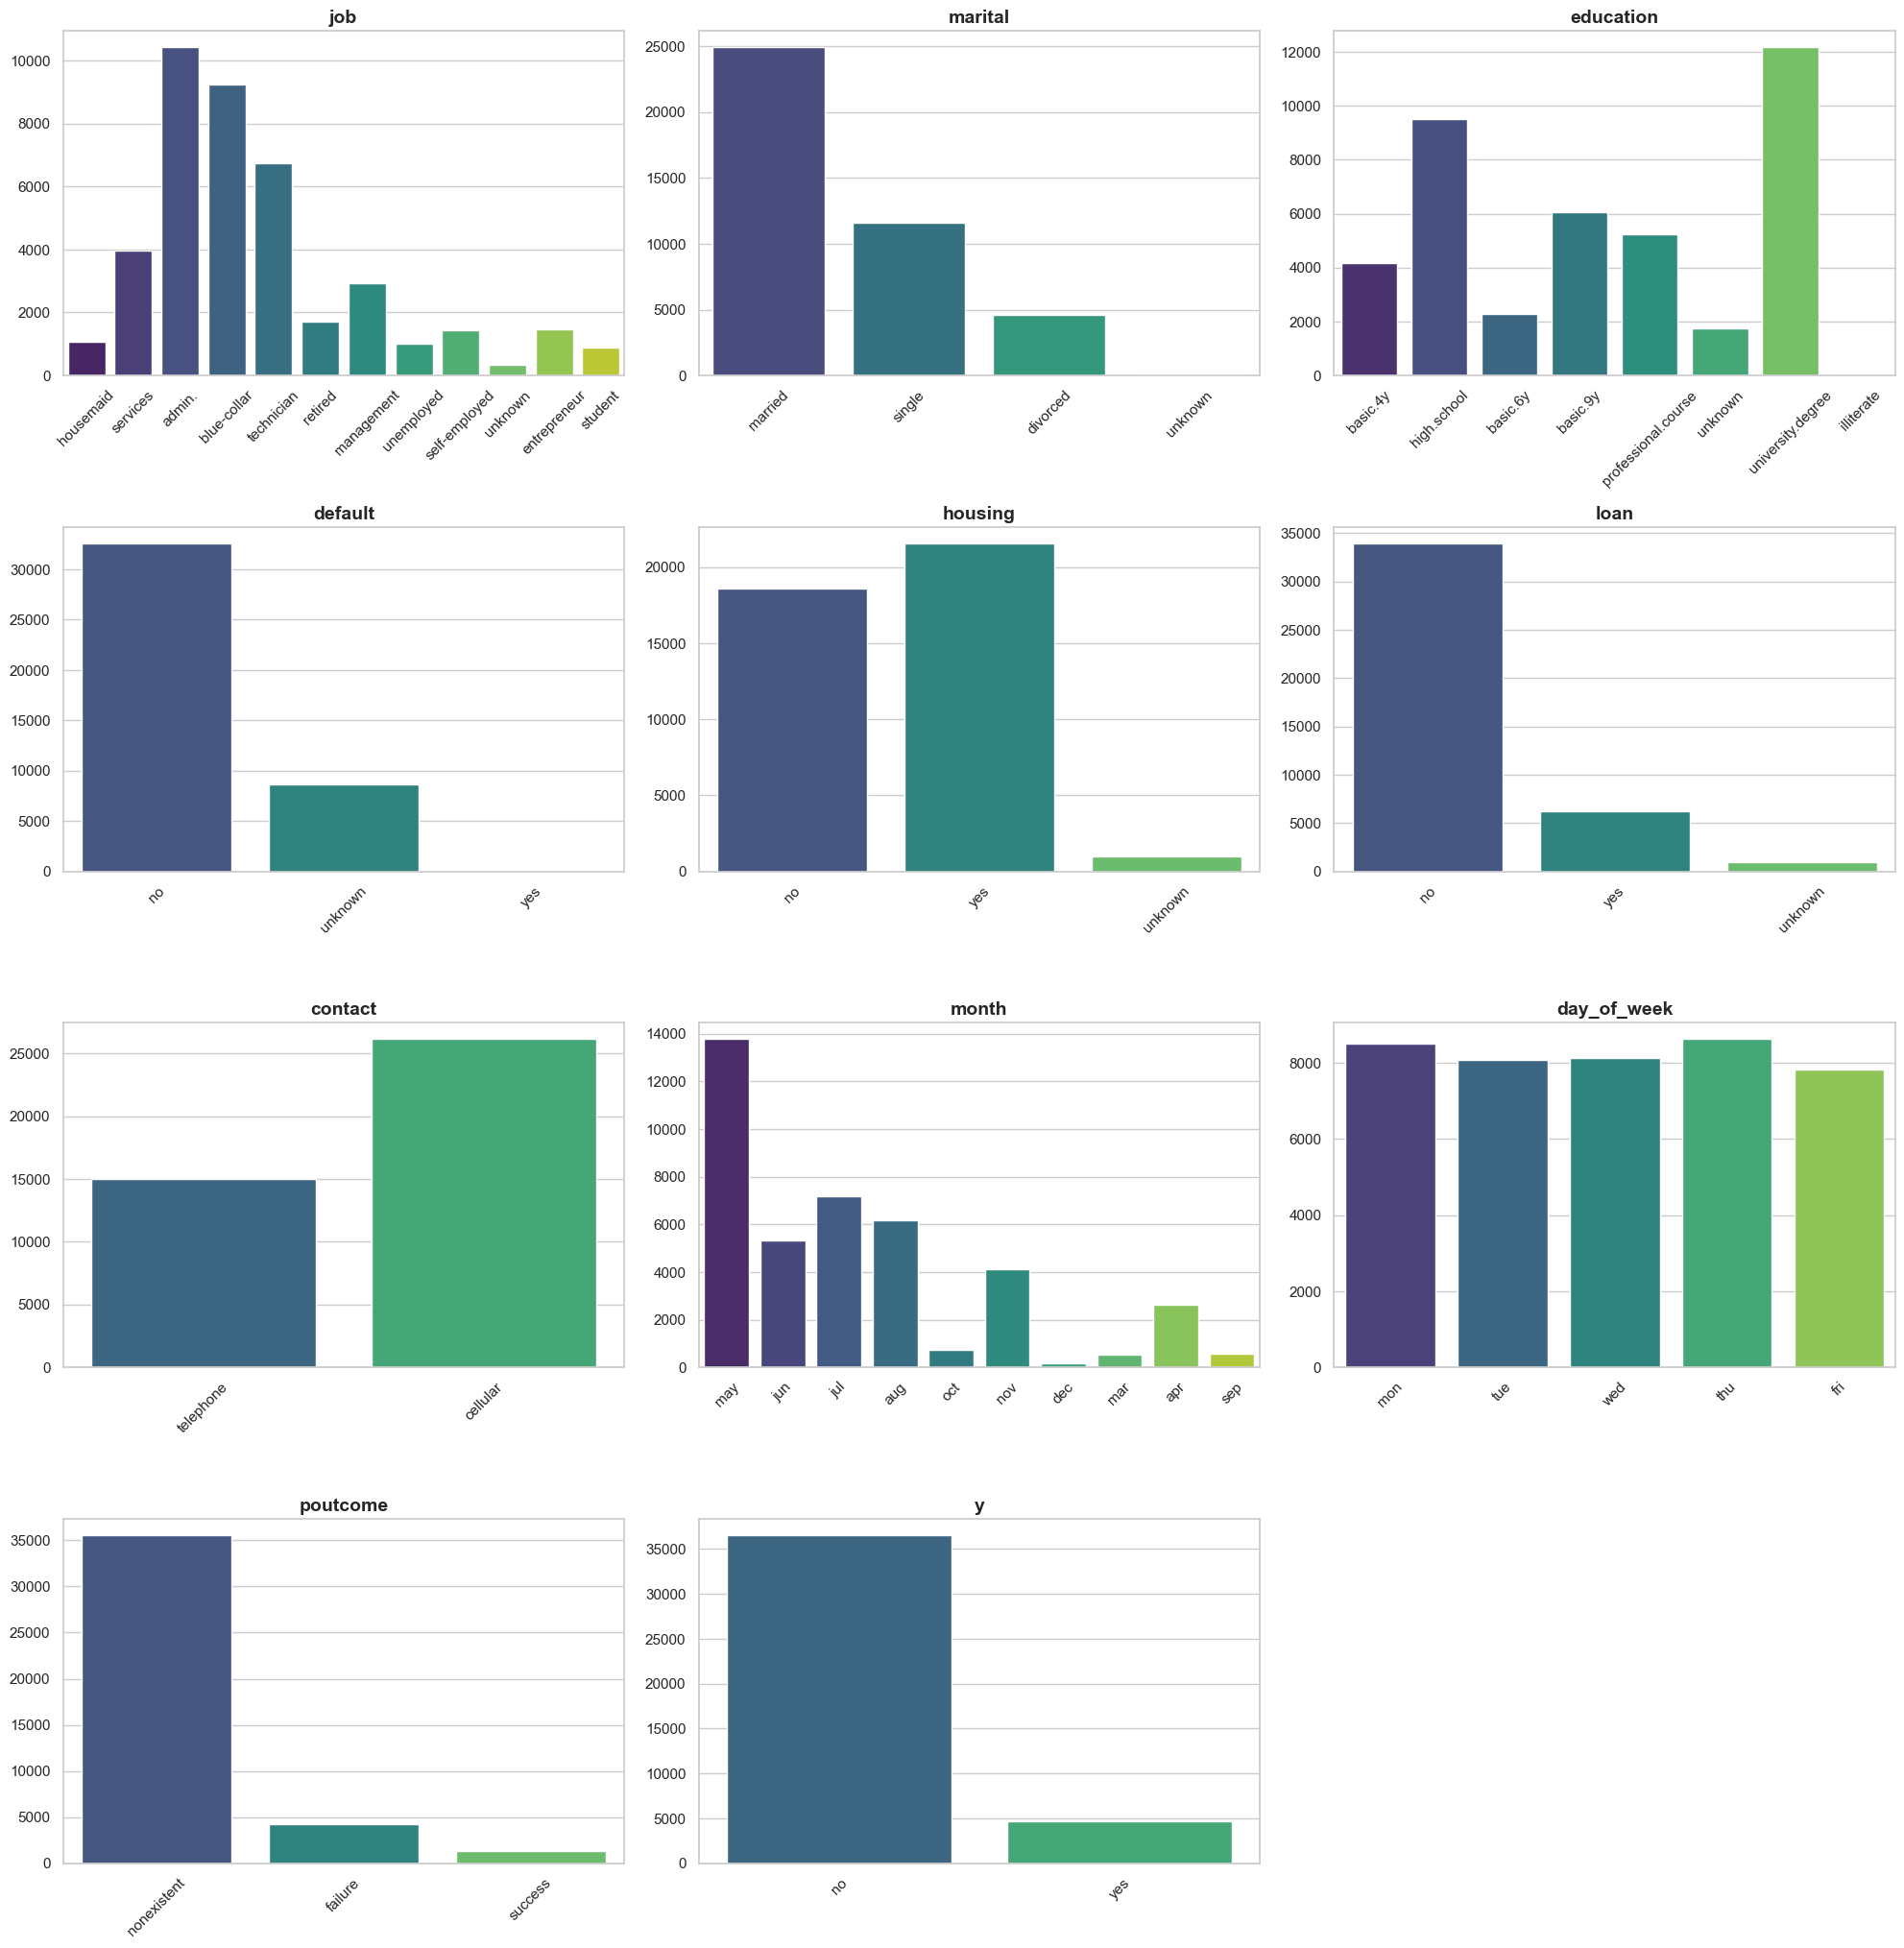

In [14]:
# Categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
                       'contact', 'month', 'day_of_week', 'poutcome', 'y']

plt.figure(figsize=(20, 30))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(6, 3, i)
    sns.countplot(data=bank_data, x=column, palette='viridis')
    plt.title(column, fontsize=14, fontweight='bold') 
    plt.xlabel(None)
    plt.ylabel(None)
    plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()

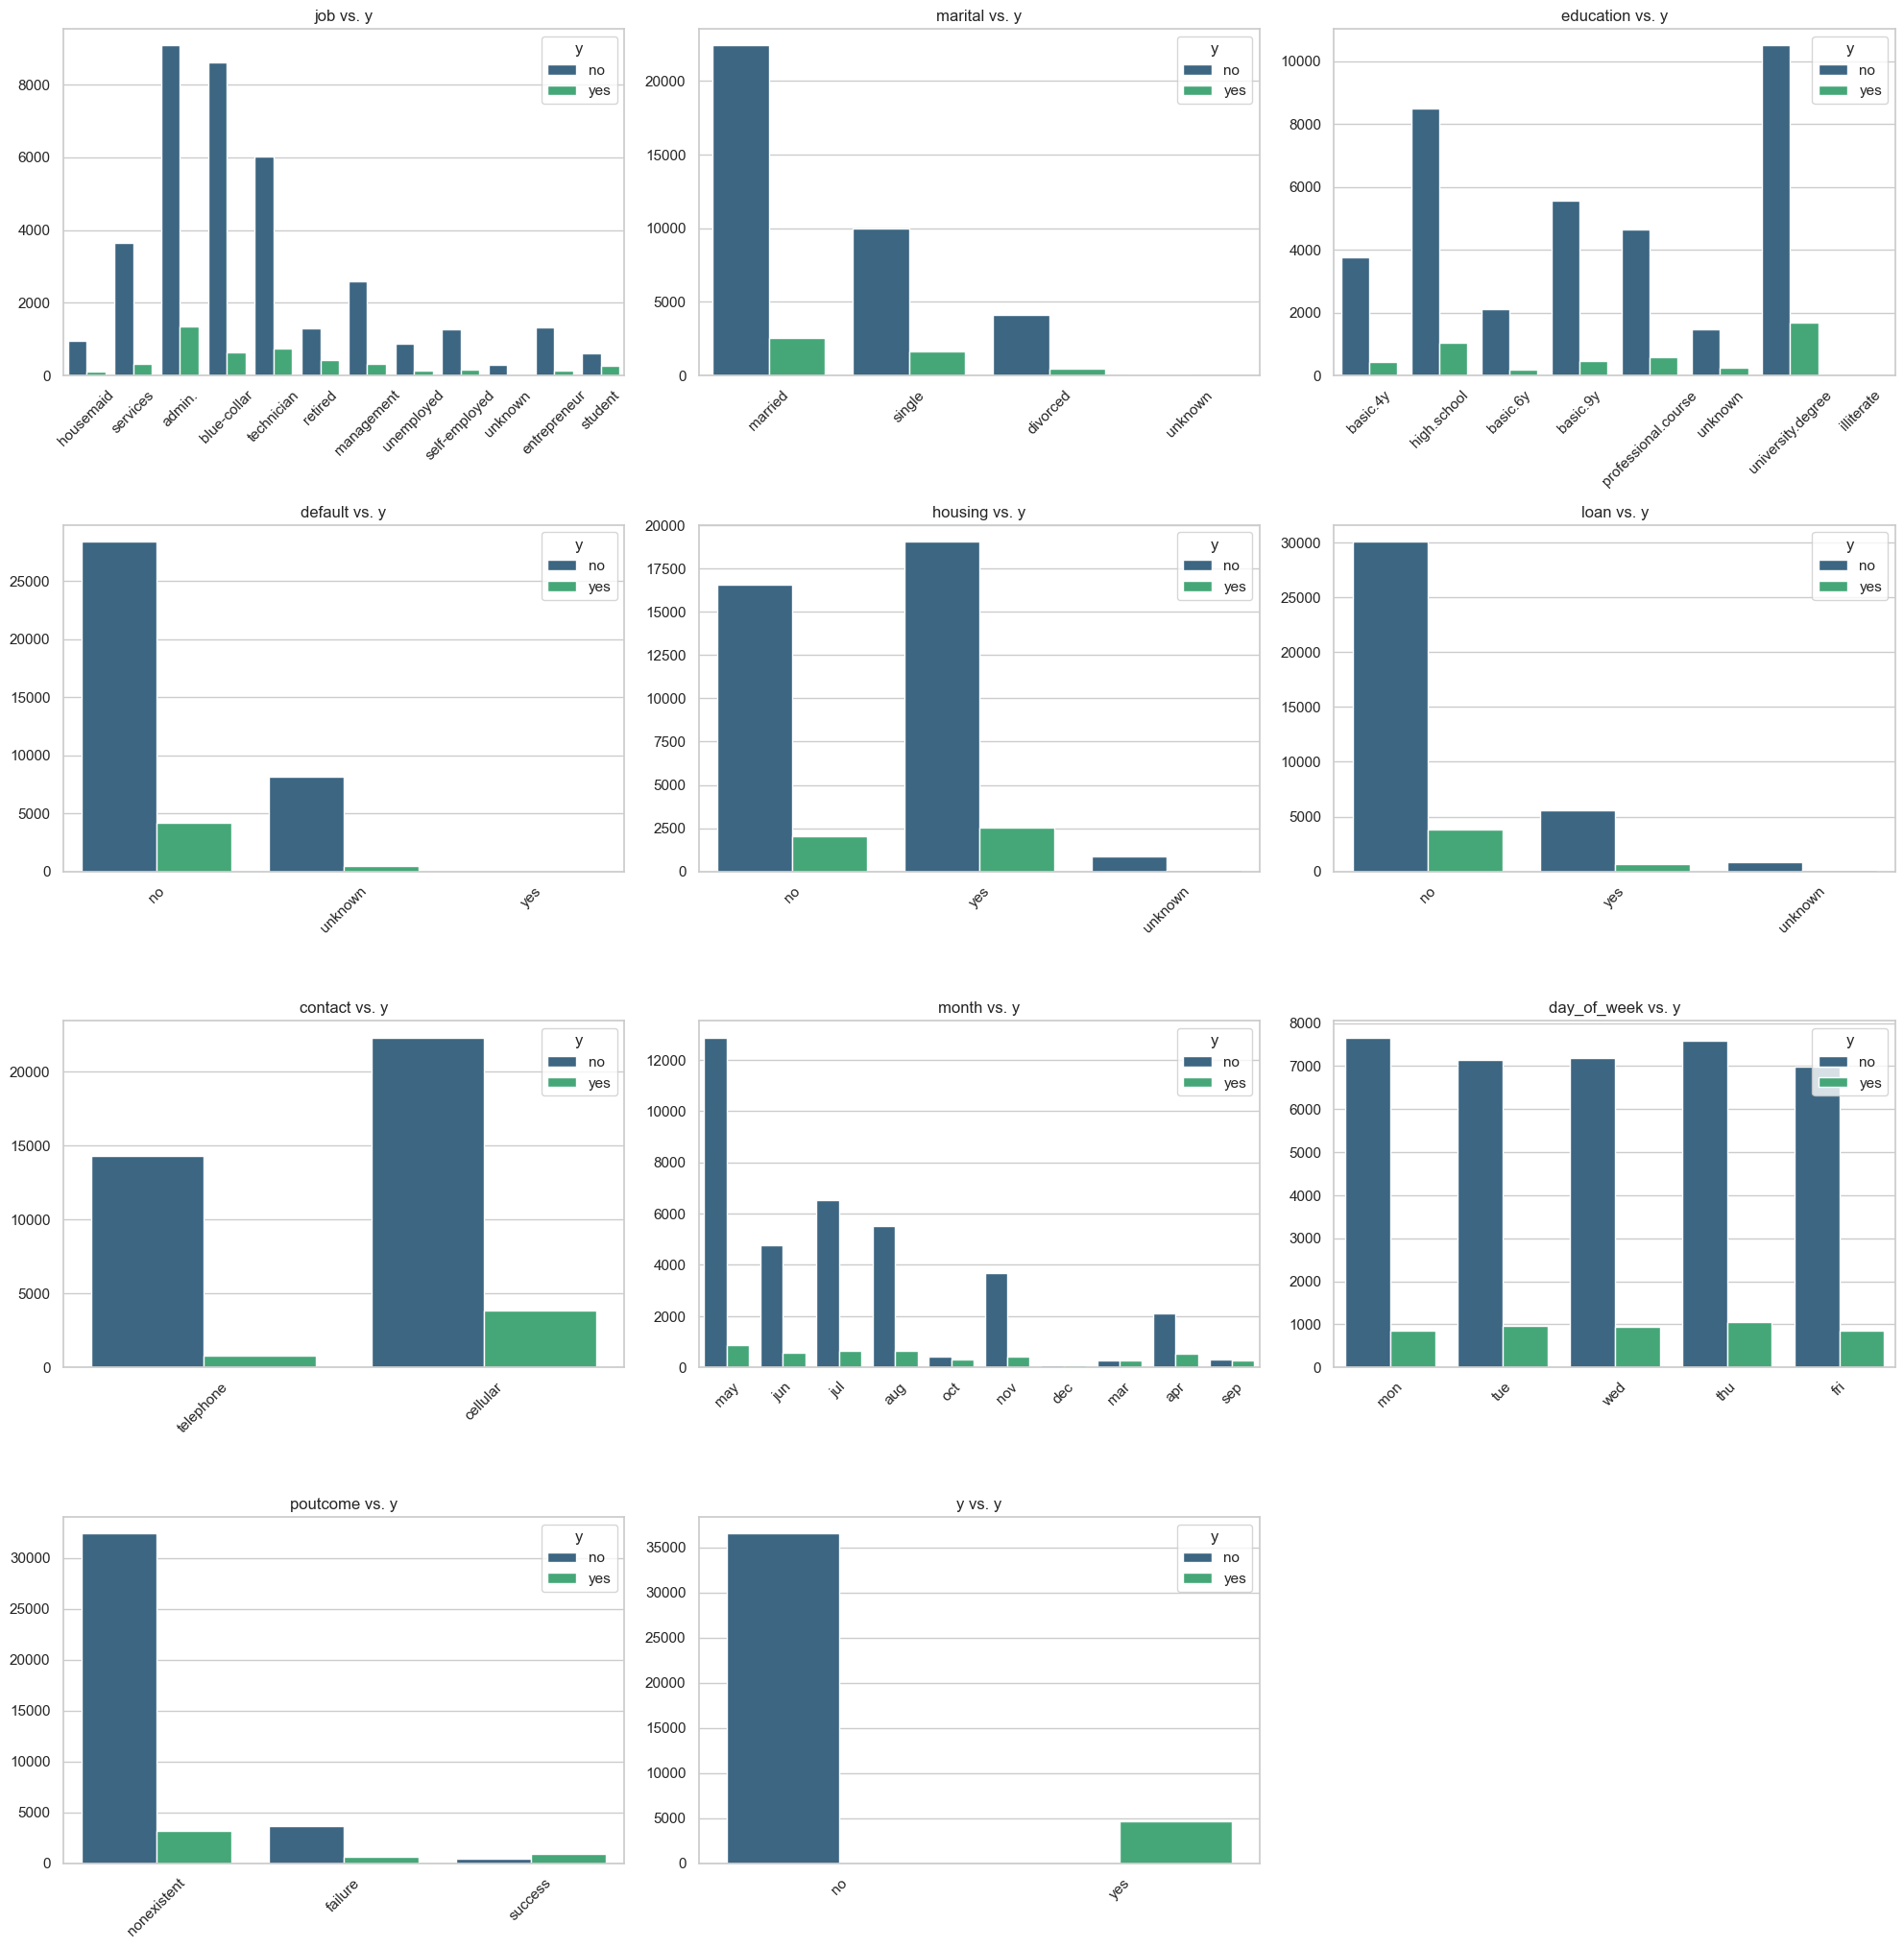

In [15]:
# Bivariable check

# Categorical
plt.figure(figsize=(20, 30))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(6, 3, i)
    sns.countplot(data=bank_data, x=column, hue='y', palette='viridis')
    plt.title(f'{column} vs. y')
    plt.xlabel(None)
    plt.ylabel(None)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

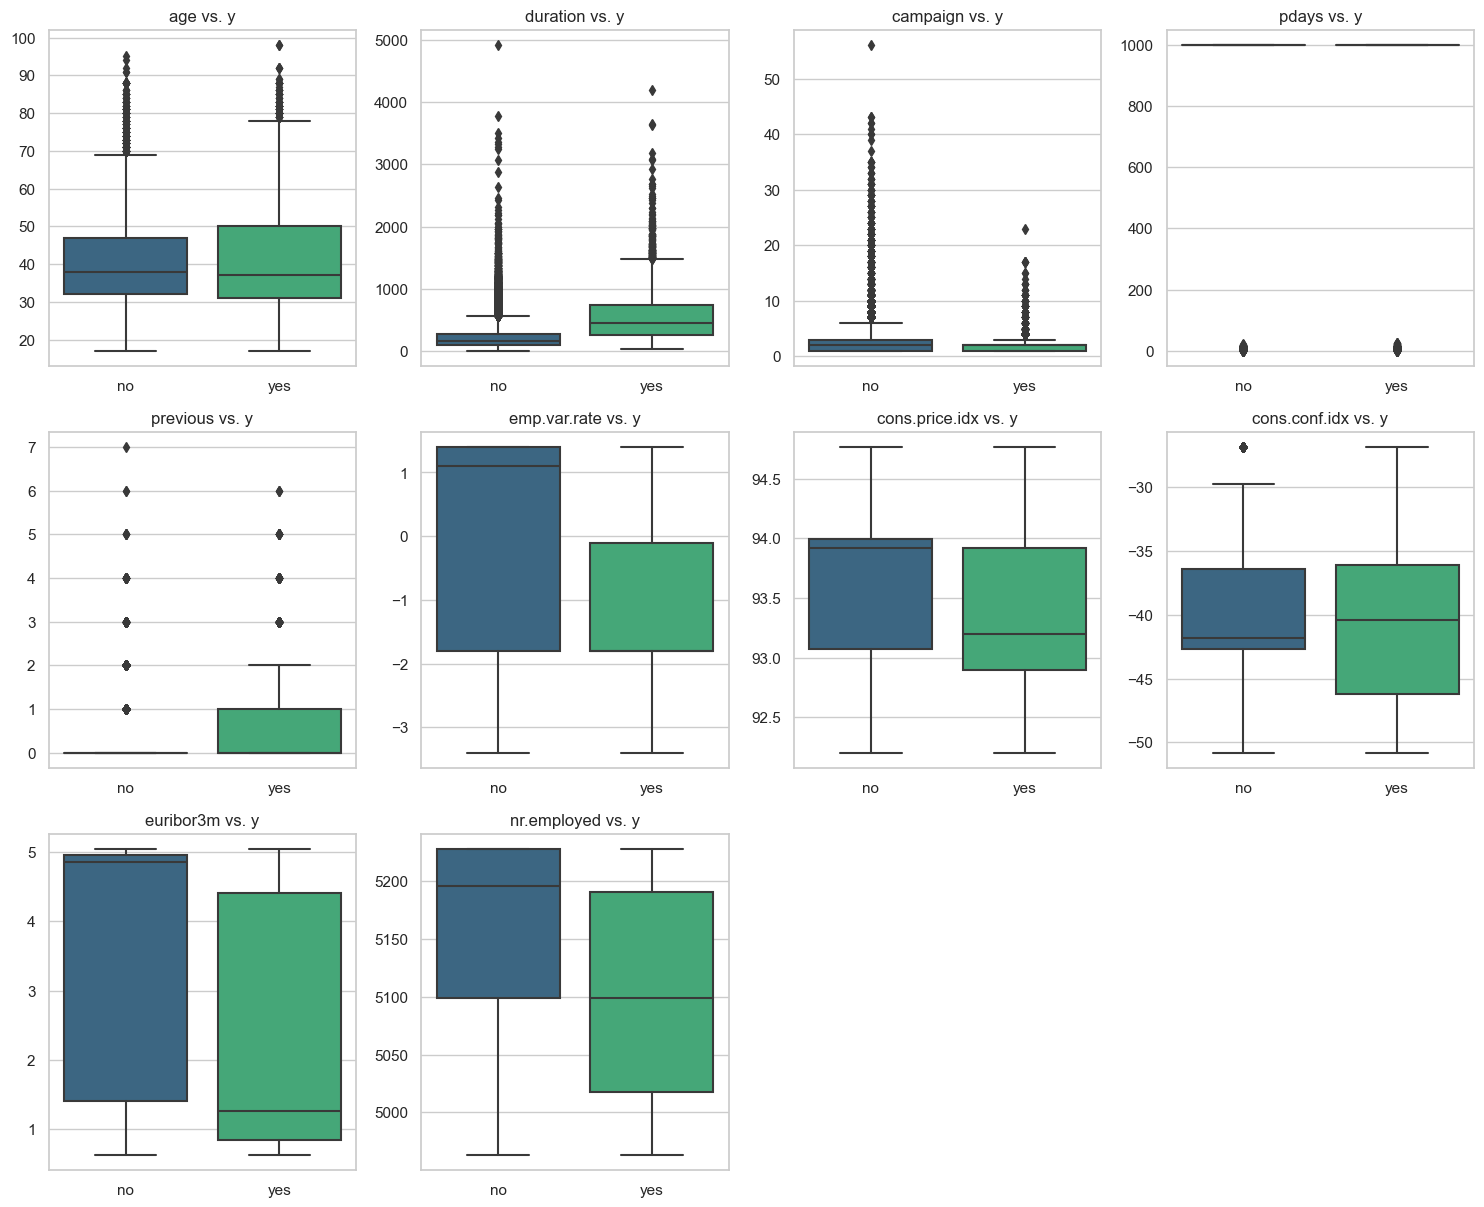

In [16]:
# Numerical 

plt.figure(figsize=(15, 20))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(data=bank_data, x='y', y=column, palette='viridis')
    plt.title(f'{column} vs. y')
    plt.xlabel(None)
    plt.ylabel(None)

plt.tight_layout()
plt.show()

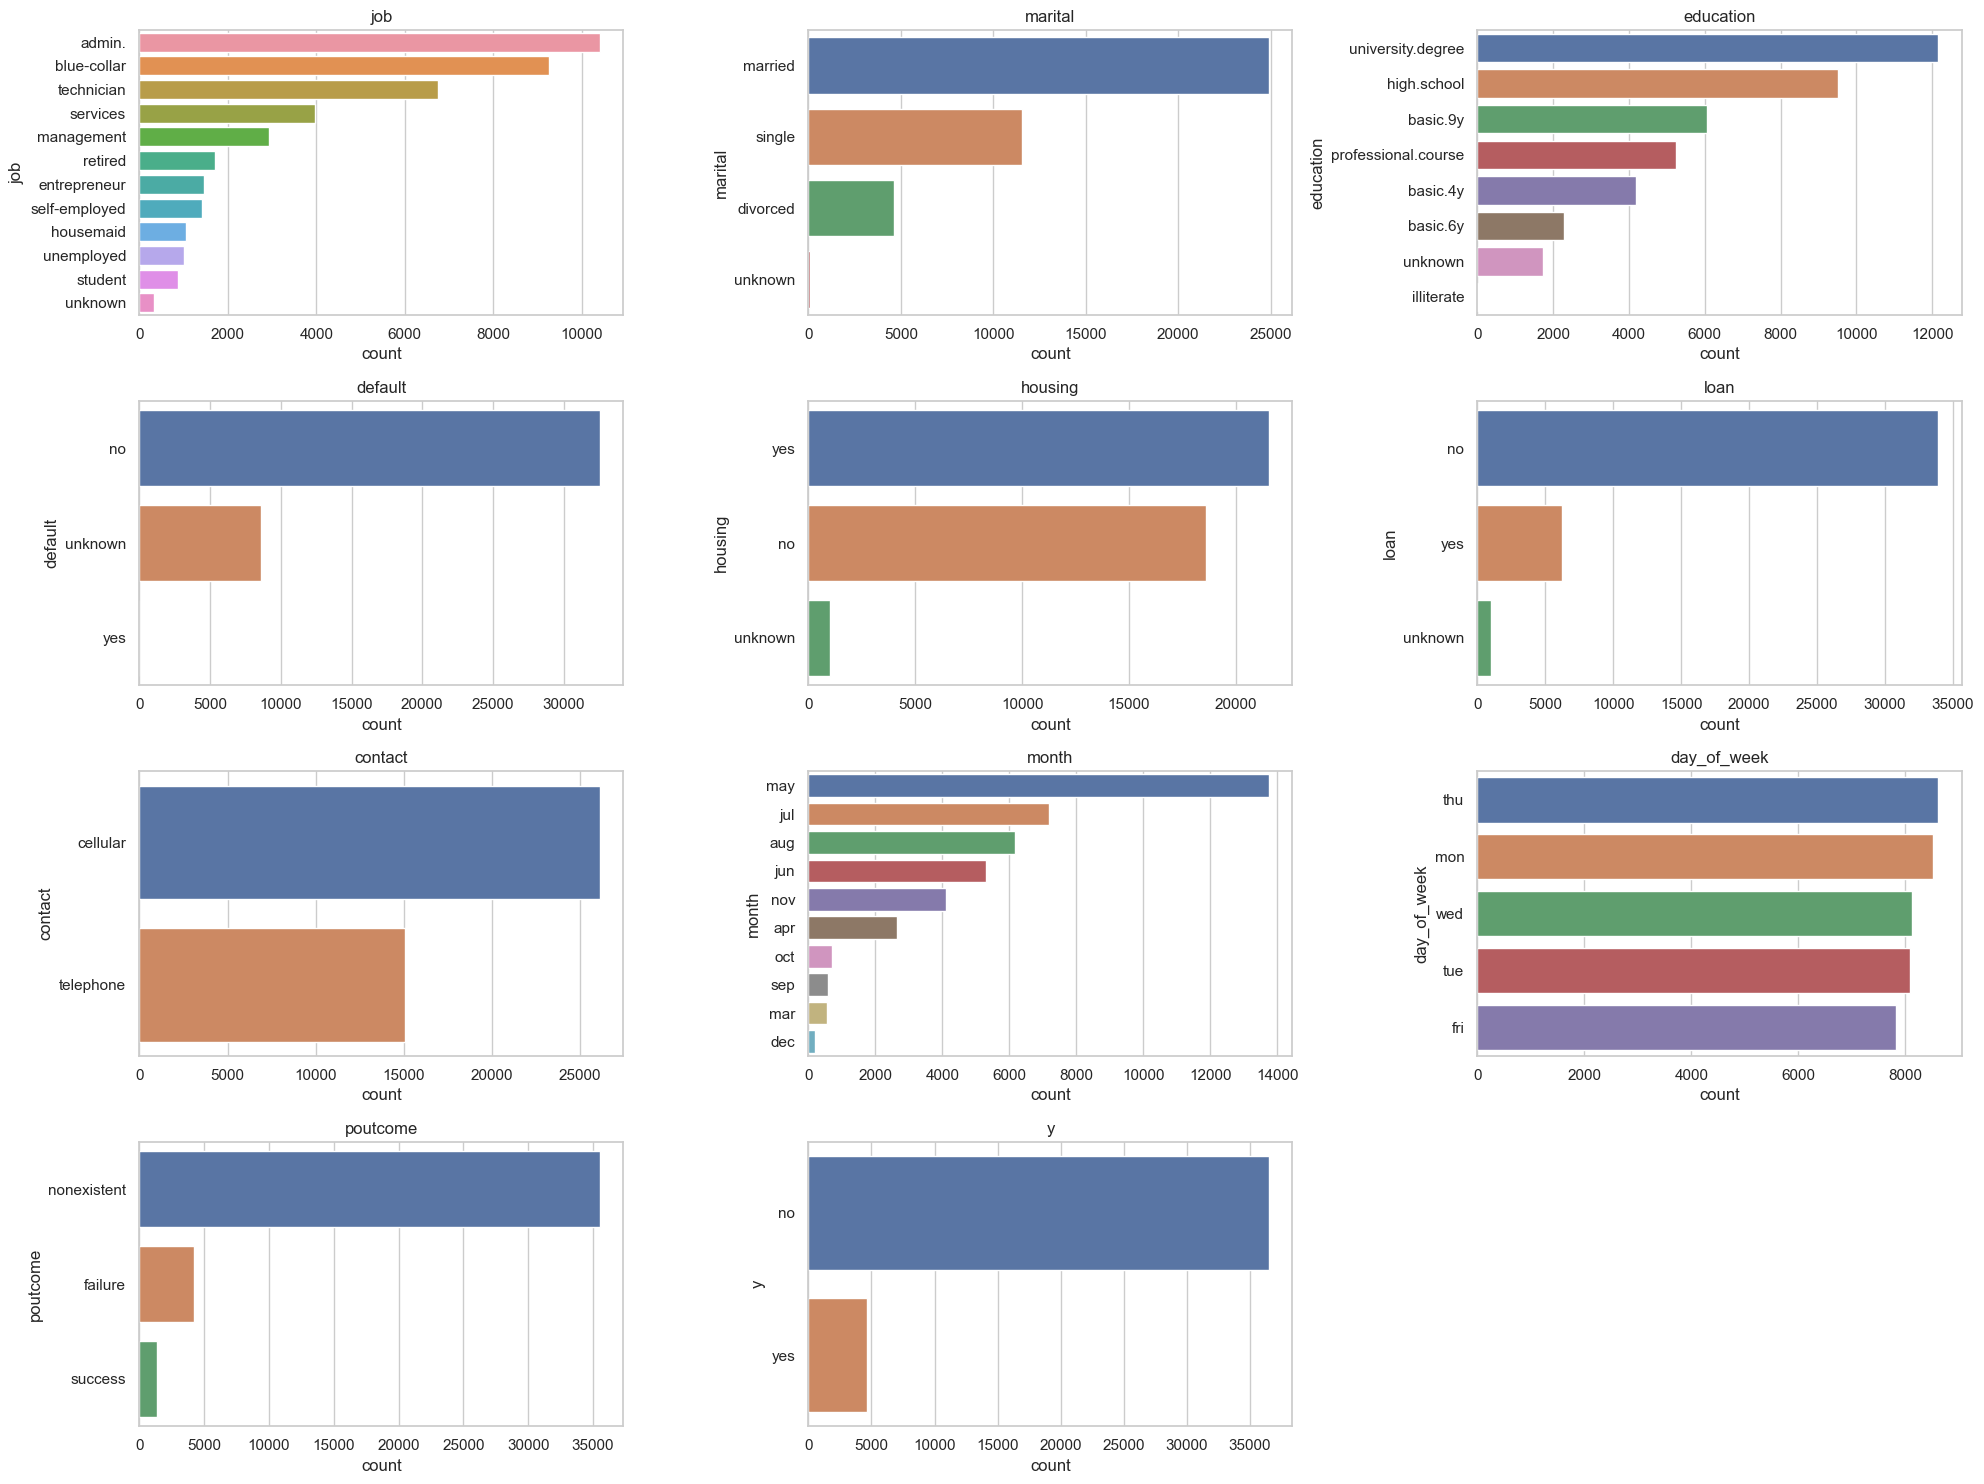

In [17]:
# Selecting categorical columns for bar charts
categorical_columns = bank_data.select_dtypes(include=['object']).columns

# Plotting bar charts for categorical columns
plt.figure(figsize=(20, 15))

for i, col in enumerate(categorical_columns):
    plt.subplot(4, 3, i + 1)
    sns.countplot(y=col, data=bank_data, order = bank_data[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

plt.show()

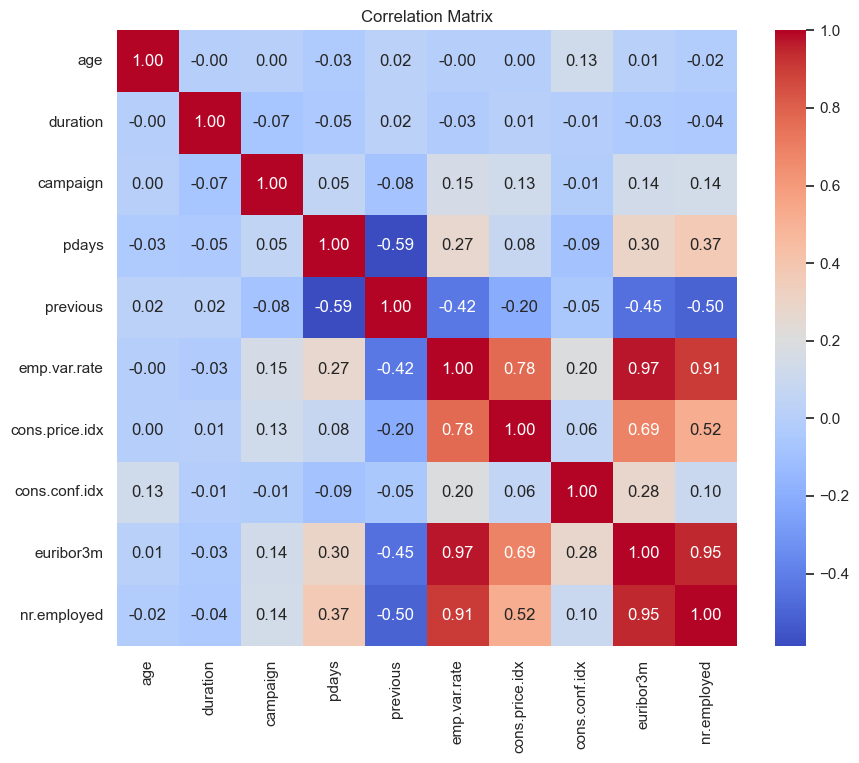

In [18]:
# Correlation matrix for numerical variables
correlation_matrix = bank_data[numerical_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
